In [1]:
import pypsa
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import folium
import math
import networkx as nx
from itertools import product

In [ ]:
"""

network_nodes = pd.read_csv('database/plotting_generators_substation.csv', sep = ",", quotechar = "'")

network_nodes

"""

In [ ]:
"""

basemap = folium.Map(location = [-0.152375, 113.899132], zoom_start = 6)

maxcapacity = max(network_nodes.p_nom)

for i in range(len(network_nodes)):
    popupinfo = (network_nodes.node.iloc[i]+ ",p_nom:" + str(network_nodes.p_nom.iloc[i]))
    folium.CircleMarker(location = [network_nodes.lat.iloc[i], network_nodes.lon.iloc[i]], 
                       tooltip = popupinfo, color = "green", fill = True, 
                       radius = math.sqrt(50 * network_nodes.p_nom.iloc[i] / maxcapacity)).add_to(basemap)
    
basemap.save("initial_nodes.html")

display(basemap)

"""

In [ ]:
"""

network_edges = pd.read_csv('database/plotting_edges_generators_edit.csv', sep = ",", quotechar = "'")

network_edges

"""

In [ ]:
"""

basemap = folium.Map(location = [-0.152375, 113.899132], zoom_start = 6)

maxcapacity = max(network_nodes.p_nom)

for i in range(len(network_nodes)):
    popupinfo = (network_nodes.node.iloc[i]+ ",p_nom:" + str(network_nodes.p_nom.iloc[i]))
    folium.CircleMarker(location = [network_nodes.lat.iloc[i], network_nodes.lon.iloc[i]], 
                       tooltip = popupinfo, color = "green", fill = True, 
                       radius = math.sqrt(20 * network_nodes.p_nom.iloc[i] / maxcapacity)).add_to(basemap)

for i in range(len(network_edges)):
    points = [[network_edges.lat0.iloc[i], network_edges.lon0.iloc[i]],
             [network_edges.lat1.iloc[i], network_edges.lon1.iloc[i]]]
    folium.PolyLine(points, color = "yellow", opacitiy = 0.7).add_to(basemap)
    
basemap.save("initial_network.html")

display(basemap)

"""

In [ ]:
"""

nodes_network = pd.read_csv('database/GENERATORS_01.csv', sep = ",", quotechar = "'")

nodes_network

"""

In [69]:
network = pd.read_csv('database/generators_substation_edited_1.csv')

network

,type,node0,lon0,lat0,id,bus0,location0,p_nom,carrier,type1,node1,lon1,lat1,bus1,location1,loc_connection
0,generator,PLTD_Lemukutan,108.7120,0.7600,NaN,NaN,Kalimantan Barat,0.412,Oil,substation,GI_Senggiring,108.9853,0.3162,4,Kalimantan Barat,Kalimantan Barat
1,generator,PLTU_Kalbar_1_Unit_1,108.8460,0.8150,NaN,NaN,Kalimantan Barat,125.000,Coal,substation,GI_PLTU_2_Kalbar,108.8653,0.8300,3,Kalimantan Barat,Kalimantan Barat
2,generator,PLTU_Kalbar_1_Unit_2,108.8460,0.8160,NaN,NaN,Kalimantan Barat,125.000,Coal,substation,GI_PLTU_3_Kalbar,108.8747,0.8361,2,Kalimantan Barat,Kalimantan Barat
3,generator,PLTU_Parit_Baru_Site_Bengkayang_#01,108.8740,0.8370,NaN,NaN,Kalimantan Barat,55.000,Coal,substation,GI_Bengkayang,109.4967,0.9056,11,Kalimantan Barat,Kalimantan Barat
4,generator,PLTU_Parit_Baru_Site_Bengkayang_#02,108.8740,0.8370,NaN,NaN,Kalimantan Barat,55.000,Coal,substation,GI_Bengkayang,109.4967,0.9056,11,Kalimantan Barat,Kalimantan Barat
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
469,substation,GI_Teluk_Pandan,117.4350,0.1614,NaN,NaN,Kalimantan Timur,NaN,NaN,substation,GI_Sangatta,117.5693,0.4701,59,Kalimantan Timur,NaN
470,substation,GI_Malinau,116.6286,3.5114,NaN,NaN,Kalimantan Utara,NaN,NaN,substation,GI_Tideng_Pale,116.8411,3.5748,61,Kalimantan Utara,NaN
471,substation,GI_Muara_Wahau,116.9215,1.0533,NaN,NaN,Kalimantan Timur,NaN,NaN,substation,GI_Sangatta,117.5693,0.4701,59,Kalimantan Timur,NaN
472,substation,GI_Muara_Wahau,116.9215,1.0533,NaN,NaN,Kalimantan Timur,NaN,NaN,substation,GI_Bulungan,117.3678,2.8101,63,Kalimantan Utara,NaN


In [70]:
kalimantan_network = nx.from_pandas_edgelist(network, 'node0', 'node1', create_using = nx.Graph)

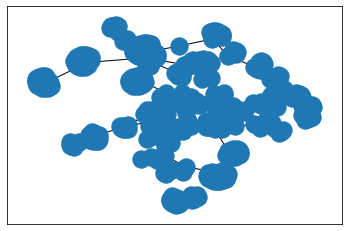

In [38]:
nx.draw_networkx(kalimantan_network, with_labels = False)

In [71]:
print(len(kalimantan_network.nodes))
kalimantan_network.nodes()

472


NodeView(('PLTD_Lemukutan', 'GI_Senggiring', 'PLTU_Kalbar_1_Unit_1', 'GI_PLTU_2_Kalbar', 'PLTU_Kalbar_1_Unit_2', 'GI_PLTU_3_Kalbar', 'PLTU_Parit_Baru_Site_Bengkayang_#01', 'GI_Bengkayang', 'PLTU_Parit_Baru_Site_Bengkayang_#02', 'PLTD_Area_Singkawang', 'GI_Singkawang', 'PLTD_Sei_Wie', 'PLTD_Sudirman', 'PLTD_Sepuk_Laut', 'GI_Parit_Baru', 'PLTD_Tanjung_Saleh', 'PLTMG_MPP_PLN_Batam_(MPP_Pontianak)', 'PLTD_Padang_Tikar', 'PLTBm_PT._Rezeki', 'PLTD_Sambas', 'GI_Sambas', 'PLTD_Siantan', 'GI_Siantan', 'PLTG_Siantan', 'PLTD_Sei_Raya', 'GI_Kota_Baru', 'PLTBm_PT_Harjohn_Timber', 'GI_Sei_Raya', 'PLTD_Dusun_Besar', 'PLTD_Bengkayang', 'PLTD_Batu_Ampar_1', 'PLTS_Temajuk', 'PLTD_Temajuk', 'PLTMH_Sajingan', 'PLTMH_Serawak_Energi_BHD_Sajingan_(B)', 'GITET_Bengkayang', 'PLTD_Tanjung_Satai', 'GI_Tayan', 'PLTMH_Merasap', 'PLTD_Pulau_Limbung', 'PLTS_Pulau_Limbung', 'PLTD_Ngabang', 'PLTU_Ketapang_#01', 'PLTU_Ketapang_#02', 'PLTD_Teluk_Melano', 'PLTU_Tembilok_(IPP_Ketapang)_#01', 'PLTU_Tembilok_(IPP_Ketapang)_

In [72]:
for index, row in network.iterrows():
    kalimantan_network.nodes[row['node0']]['coords'] = row['lon0'],row['lat0']
    kalimantan_network.nodes[row['node1']]['coords'] = row['lon1'],row['lat1']
    kalimantan_network.nodes[row['node0']]['type'] = row['type']
    kalimantan_network.nodes[row['node1']]['type'] = row['type1']

In [73]:
print(len(kalimantan_network.nodes))
print(kalimantan_network.nodes(data = True))

472
[('PLTD_Lemukutan', {'coords': (108.712, 0.76), 'type': 'generator'}), ('GI_Senggiring', {'coords': (108.9853, 0.3162), 'type': 'substation'}), ('PLTU_Kalbar_1_Unit_1', {'coords': (108.846, 0.815), 'type': 'generator'}), ('GI_PLTU_2_Kalbar', {'coords': (108.8653, 0.83), 'type': 'substation'}), ('PLTU_Kalbar_1_Unit_2', {'coords': (108.846, 0.816), 'type': 'generator'}), ('GI_PLTU_3_Kalbar', {'coords': (108.8747, 0.8361), 'type': 'substation'}), ('PLTU_Parit_Baru_Site_Bengkayang_#01', {'coords': (108.874, 0.837), 'type': 'generator'}), ('GI_Bengkayang', {'coords': (109.4967, 0.9056), 'type': 'substation'}), ('PLTU_Parit_Baru_Site_Bengkayang_#02', {'coords': (108.874, 0.837), 'type': 'generator'}), ('PLTD_Area_Singkawang', {'coords': (108.98, 0.912), 'type': 'generator'}), ('GI_Singkawang', {'coords': (108.9876, 0.9266), 'type': 'substation'}), ('PLTD_Sei_Wie', {'coords': (108.987, 0.926), 'type': 'generator'}), ('PLTD_Sudirman', {'coords': (108.998, 0.911), 'type': 'generator'}), ('P

In [58]:
nx.get_node_attributes(kalimantan_network, 'coords')

{'PLTD_Lemukutan': (108.712, 0.76),
 'GI_Senggiring': (108.9853, 0.3162),
 'PLTU_Kalbar_1_Unit_1': (108.846, 0.815),
 'GI_PLTU_2_Kalbar': (108.8653, 0.83),
 'PLTU_Kalbar_1_Unit_2': (108.846, 0.816),
 'GI_PLTU_3_Kalbar': (108.8747, 0.8361),
 'PLTU_Parit_Baru_Site_Bengkayang_#01': (108.874, 0.837),
 'GI_Bengkayang': (109.4967, 0.9056),
 'PLTU_Parit_Baru_Site_Bengkayang_#02': (108.874, 0.837),
 'PLTD_Area_Singkawang': (108.98, 0.912),
 'GI_Singkawang': (108.9876, 0.9266),
 'PLTD_Sei_Wie': (108.987, 0.926),
 'PLTD_Sudirman': (108.998, 0.911),
 'PLTD_Sepuk_Laut': (109.078, -0.222),
 'GI_Parit_Baru': (109.2055, 0.0592),
 'PLTD_Tanjung_Saleh': (109.148, -0.108),
 'PLTMG_MPP_PLN_Batam_(MPP_Pontianak)': (109.204, 0.059),
 'PLTD_Padang_Tikar': (109.272, 0.682),
 'PLTBm_PT._Rezeki': (109.286, 0.011),
 'PLTD_Sambas': (109.296, 1.36),
 'GI_Sambas': (109.2688, 1.3429),
 'PLTD_Siantan': (109.327, -0.002),
 'GI_Siantan': (109.328, -0.0002),
 'PLTG_Siantan': (109.327, -0.001),
 'PLTD_Sei_Raya': (109.38

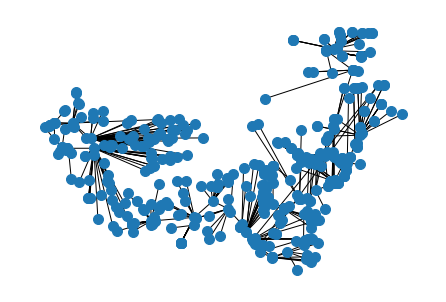

In [74]:
nx.draw(kalimantan_network, nx.get_node_attributes(kalimantan_network, 'coords'), with_labels = False, node_size = 100)

In [75]:
nx.get_node_attributes(kalimantan_network, 'type')

{'PLTD_Lemukutan': 'generator',
 'GI_Senggiring': 'substation',
 'PLTU_Kalbar_1_Unit_1': 'generator',
 'GI_PLTU_2_Kalbar': 'substation',
 'PLTU_Kalbar_1_Unit_2': 'generator',
 'GI_PLTU_3_Kalbar': 'substation',
 'PLTU_Parit_Baru_Site_Bengkayang_#01': 'generator',
 'GI_Bengkayang': 'substation',
 'PLTU_Parit_Baru_Site_Bengkayang_#02': 'generator',
 'PLTD_Area_Singkawang': 'generator',
 'GI_Singkawang': 'substation',
 'PLTD_Sei_Wie': 'generator',
 'PLTD_Sudirman': 'generator',
 'PLTD_Sepuk_Laut': 'generator',
 'GI_Parit_Baru': 'substation',
 'PLTD_Tanjung_Saleh': 'generator',
 'PLTMG_MPP_PLN_Batam_(MPP_Pontianak)': 'generator',
 'PLTD_Padang_Tikar': 'generator',
 'PLTBm_PT._Rezeki': 'generator',
 'PLTD_Sambas': 'generator',
 'GI_Sambas': 'substation',
 'PLTD_Siantan': 'generator',
 'GI_Siantan': 'substation',
 'PLTG_Siantan': 'generator',
 'PLTD_Sei_Raya': 'generator',
 'GI_Kota_Baru': 'substation',
 'PLTBm_PT_Harjohn_Timber': 'generator',
 'GI_Sei_Raya': 'substation',
 'PLTD_Dusun_Besar'

In [76]:
color_type_map = {'substation': 'r', 'generator': 'b'}

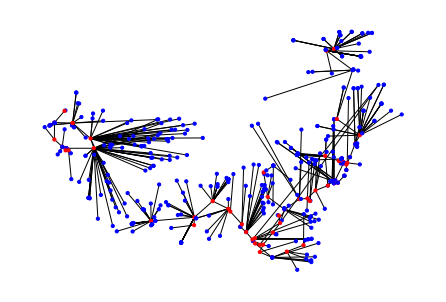

In [77]:
nx.draw(kalimantan_network, nx.get_node_attributes(kalimantan_network, 'coords'),
        node_color = [color_type_map[node[1]['type']]
                      for node in kalimantan_network.nodes(data=True)], with_labels = False, node_size = 10)

In [78]:
def substation_nodes(kalimantan_network, type, substation):

    result = []

    d = nx.get_node_attributes(kalimantan_network, type)

    for key, v in d.items():
        if(v == substation):
            result.append(key)

    return result

In [79]:
print(len(substation_nodes(kalimantan_network, 'type', 'substation')))
print(substation_nodes(kalimantan_network, 'type', 'substation'))

64
['GI_Senggiring', 'GI_PLTU_2_Kalbar', 'GI_PLTU_3_Kalbar', 'GI_Bengkayang', 'GI_Singkawang', 'GI_Parit_Baru', 'GI_Sambas', 'GI_Siantan', 'GI_Kota_Baru', 'GI_Sei_Raya', 'GITET_Bengkayang', 'GI_Tayan', 'GI_Ngabang', 'GI_Pangkalanbun', 'GI_Sampit', 'GI_PLTU_Sampit', 'GI_Palangkaraya', 'GI_Kasongan', 'GI_Sebangau', 'GI_S_Mintin', 'GI_Pulau_Pisang', 'GI_Selat', 'GI_Muara_Komam', 'GI_Cempaka', 'GI_Trisakti', 'GI_Muara_Teweh', 'GI_Bulungan', 'GI_Buntok', 'GI_Mantuil', 'GI_Asam-asam', 'GI_Bangkanai', 'GI_Rantau', 'GI_Kariangau', 'GI_Amuntai', 'GI_Barikin', 'GI_Tanjung', 'GI_Bandara', 'GI_Karangjoang', 'GI_Tideng_Pale', 'GI_Pelaihari', 'GI_Kotabangun', 'GI_Satui', 'GI_Batulicin', 'GI_Kuaro', 'GI_Kayutangi', 'GI_Grogot', 'GI_Seberang_Barito', 'GI_Embalut', 'GI_Longikis', 'GI_Sangatta', 'GI_Malinau', 'GI_Petung', 'GI_Industri', 'GI_Manggar_Sari', 'GI_Bukit_Biru', 'GI_Harapan_Baru', 'GI_Tengkawang', 'GI_Muara_Wahau', 'GI_Senipah', 'GI_Bukuan', 'GI_Muara_Jawa', 'GI_Sambutan', 'GI_Muara_Badak', 'G

In [81]:
def generator_nodes(kalimantan_network, type, generator):

    result = []

    d = nx.get_node_attributes(kalimantan_network, type)

    for key, v in d.items():
        if(v == generator):
            result.append(key)

    return result

In [82]:
print(len(generator_nodes(kalimantan_network, 'type', 'generator')))
print(generator_nodes(kalimantan_network, 'type', 'generator'))

408
['PLTD_Lemukutan', 'PLTU_Kalbar_1_Unit_1', 'PLTU_Kalbar_1_Unit_2', 'PLTU_Parit_Baru_Site_Bengkayang_#01', 'PLTU_Parit_Baru_Site_Bengkayang_#02', 'PLTD_Area_Singkawang', 'PLTD_Sei_Wie', 'PLTD_Sudirman', 'PLTD_Sepuk_Laut', 'PLTD_Tanjung_Saleh', 'PLTMG_MPP_PLN_Batam_(MPP_Pontianak)', 'PLTD_Padang_Tikar', 'PLTBm_PT._Rezeki', 'PLTD_Sambas', 'PLTD_Siantan', 'PLTG_Siantan', 'PLTD_Sei_Raya', 'PLTBm_PT_Harjohn_Timber', 'PLTD_Dusun_Besar', 'PLTD_Bengkayang', 'PLTD_Batu_Ampar_1', 'PLTS_Temajuk', 'PLTD_Temajuk', 'PLTMH_Sajingan', 'PLTMH_Serawak_Energi_BHD_Sajingan_(B)', 'PLTD_Tanjung_Satai', 'PLTMH_Merasap', 'PLTD_Pulau_Limbung', 'PLTS_Pulau_Limbung', 'PLTD_Ngabang', 'PLTU_Ketapang_#01', 'PLTU_Ketapang_#02', 'PLTD_Teluk_Melano', 'PLTU_Tembilok_(IPP_Ketapang)_#01', 'PLTU_Tembilok_(IPP_Ketapang)_#02', 'PLTBm_PT_Alas_Kusuma', 'PLTD_Sukaharja', 'PLTD_Cempaka_Putih', 'PLTS_Sidding', 'PLTD_Teraju', 'PLTD_Kendawangan_Kanan', 'PLTD_Ulak_Medang', 'PLTA_SESCO_275', 'PLTMH_Serawak_Energi_BHD_Balai_Karang

In [83]:
nx.voronoi_cells(kalimantan_network, substation_nodes(kalimantan_network, 'type', 'substation'))

{'GI_Senggiring': {'GI_Senggiring', 'PLTD_Lemukutan'},
 'GI_PLTU_2_Kalbar': {'GI_PLTU_2_Kalbar', 'PLTU_Kalbar_1_Unit_1'},
 'GI_PLTU_3_Kalbar': {'GI_PLTU_3_Kalbar', 'PLTU_Kalbar_1_Unit_2'},
 'GI_Bengkayang': {'GI_Bengkayang',
  'PLTD_Batu_Ampar_1',
  'PLTD_Bengkayang',
  'PLTD_Ngabang',
  'PLTD_Temajuk',
  'PLTMH_Merasap',
  'PLTMH_Sajingan',
  'PLTS_Temajuk',
  'PLTU_Parit_Baru_Site_Bengkayang_#01',
  'PLTU_Parit_Baru_Site_Bengkayang_#02'},
 'GI_Singkawang': {'GI_Singkawang',
  'PLTD_Area_Singkawang',
  'PLTD_Sei_Wie',
  'PLTD_Sudirman'},
 'GI_Parit_Baru': {'GI_Parit_Baru',
  'PLTBm_PT._Rezeki',
  'PLTD_Padang_Tikar',
  'PLTD_Sepuk_Laut',
  'PLTD_Tanjung_Saleh',
  'PLTMG_MPP_PLN_Batam_(MPP_Pontianak)'},
 'GI_Sambas': {'GI_Sambas', 'PLTD_Sambas'},
 'GI_Siantan': {'GI_Siantan', 'PLTD_Siantan', 'PLTG_Siantan'},
 'GI_Kota_Baru': {'GI_Kota_Baru', 'PLTD_Sei_Raya'},
 'GI_Sei_Raya': {'GI_Sei_Raya', 'PLTBm_PT_Harjohn_Timber', 'PLTD_Dusun_Besar'},
 'GITET_Bengkayang': {'GITET_Bengkayang',
  'PLT